### STEP 1: INITIALIZATION

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/saltandpepper_Screen Shot 2018-06-12 at 8.53.54 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/Screen Shot 2018-06-12 at 9.27.26 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/rotated_by_45_Screen Shot 2018-06-12 at 8.58.13 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/rotated_by_75_Screen Shot 2018-06-12 at 8.47.41 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/rotated_by_75_Screen Shot 2018-06-12 at 8.56.30 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/saltandpepper_Screen Shot 2018-06-12 at 9.11.17 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/vertical_flip_Screen Shot 2018-06-12 at 9.19.08

**Import important libraries such as Tensorflow, Keras, Matlab plotting.**

In [2]:
# Importing libraries
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import display, Image # for displaying images
%matplotlib inline
import os

In [3]:
# Getting labels of training data
labels = os.listdir('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/train')
labels

['rottenbanana',
 'freshoranges',
 'rottenoranges',
 'freshbanana',
 'rottenapples',
 'freshapples']


 ROTTENBANANA


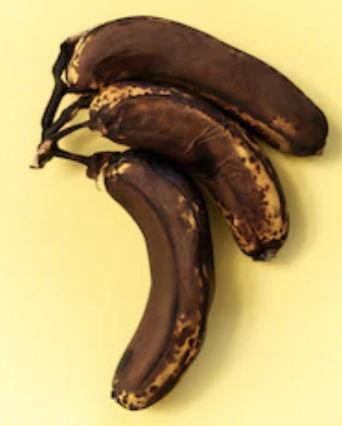

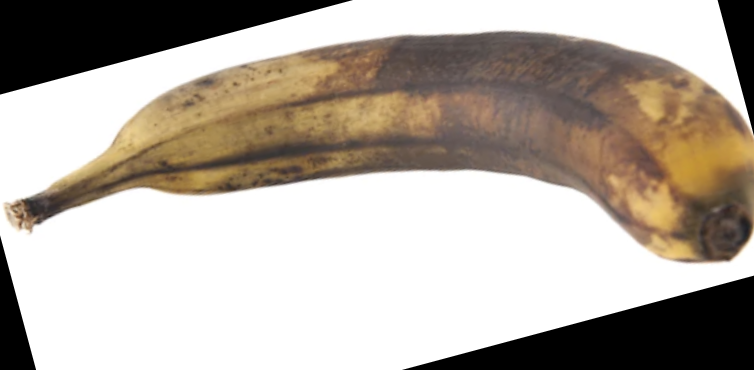

there are  2224  images in  rottenbanana class

 FRESHORANGES


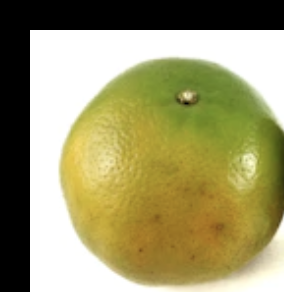

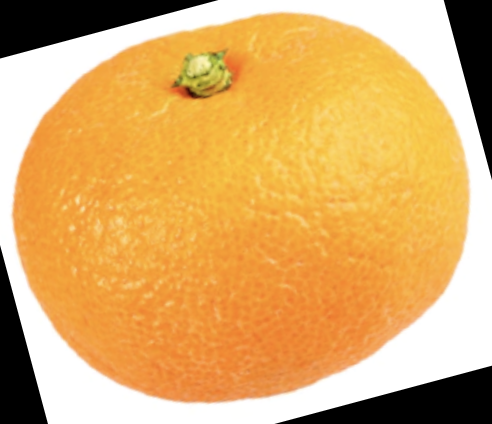

there are  1466  images in  freshoranges class

 ROTTENORANGES


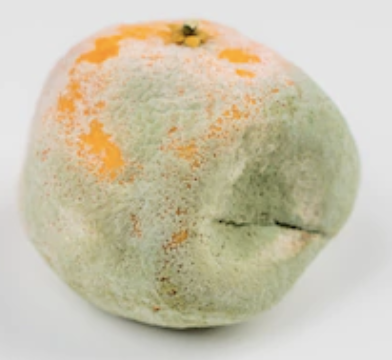

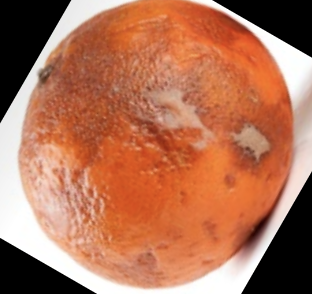

there are  1595  images in  rottenoranges class

 FRESHBANANA


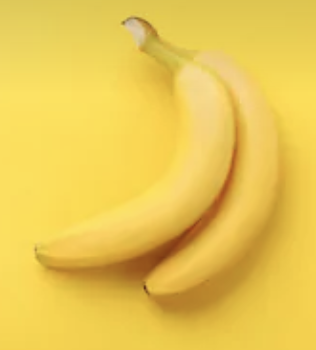

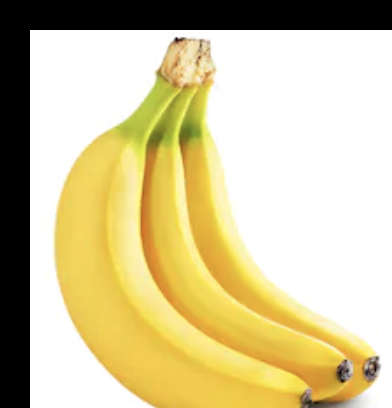

there are  1581  images in  freshbanana class

 ROTTENAPPLES


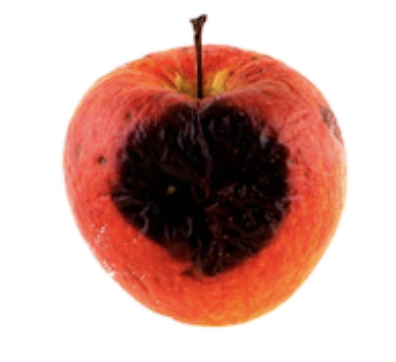

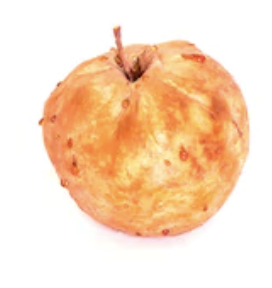

there are  2342  images in  rottenapples class

 FRESHAPPLES


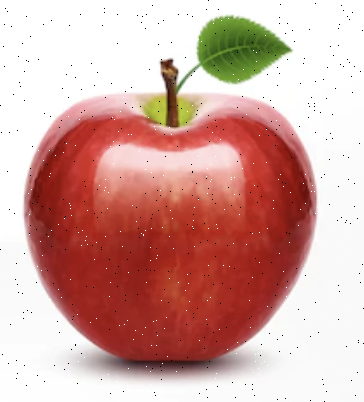

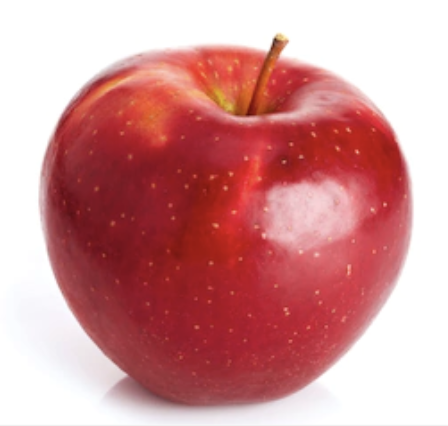

there are  1693  images in  freshapples class


In [4]:
num = []

for i in labels:
    path = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/train/{0}/'.format(i)
    folder_data = os.listdir(path)
    k=0
    print('\n', i.upper())
    for j in folder_data:
        if(k<2):
            display(Image(path+j))
        k=k+1
    num.append(k)
    print('there are ', k,' images in ', i, 'class')

In [5]:
# Get images from files using ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

tg = datagen.flow_from_directory(directory='/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/train', target_size=(20,20), classes=labels, batch_size=25, subset='training')
vg = datagen.flow_from_directory(directory='/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/train', target_size=(20,20), classes=labels, batch_size=25, subset='validation')

Found 8723 images belonging to 6 classes.
Found 2178 images belonging to 6 classes.


### STEP 3: Build our Convolutional Neural Network

In [6]:
# building model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (20,20,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(6, activation='softmax'))

**Compile model.**

In [7]:
# Compile model
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

**Summary of our model**

In [8]:
model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               73856     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1

In [9]:
# Train model
history = model.fit_generator(generator=tg, steps_per_epoch=len(tg), epochs=8, validation_data=vg, validation_steps=len(vg))

Epoch 1/8
349/349 [==============================] - 131s 375ms/step - loss: 0.7828 - accuracy: 0.7088 - val_loss: 0.4568 - val_accuracy: 0.8421
Epoch 2/8
349/349 [==============================] - 57s 164ms/step - loss: 0.4282 - accuracy: 0.8512 - val_loss: 0.3419 - val_accuracy: 0.8829
Epoch 3/8
349/349 [==============================] - 56s 162ms/step - loss: 0.3366 - accuracy: 0.8813 - val_loss: 0.2852 - val_accuracy: 0.8949
Epoch 4/8
349/349 [==============================] - 57s 163ms/step - loss: 0.2845 - accuracy: 0.8980 - val_loss: 0.2501 - val_accuracy: 0.9063
Epoch 5/8
349/349 [==============================] - 57s 164ms/step - loss: 0.2251 - accuracy: 0.9180 - val_loss: 0.2257 - val_accuracy: 0.9164
Epoch 6/8
349/349 [==============================] - 57s 163ms/step - loss: 0.1948 - accuracy: 0.9284 - val_loss: 0.1614 - val_accuracy: 0.9403
Epoch 7/8
349/349 [==============================] - 58s 165ms/step - loss: 0.1616 - accuracy: 0.9429 - val_loss: 0.1386 - val_accuracy

### STEP 4: SHOW IMPORTANT PLOTS

**Plot Accuracy over epochs plot(Higher over time is better)**

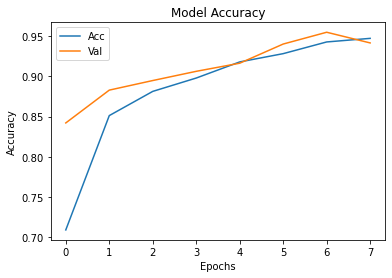

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

**Plot Loss over epochs plot. (Lower over time is better)**

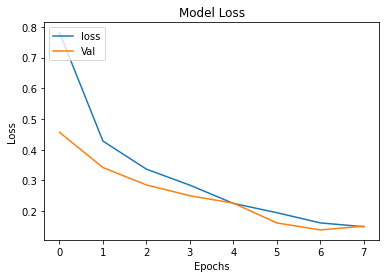

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

**STEP 5: Test our model**

In [12]:
test_set = datagen.flow_from_directory(directory='/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test', target_size=(20,20), classes=labels, batch_size=25, subset='validation')

Found 538 images belonging to 6 classes.


In [13]:
prediction = model.predict(test_set)

In [14]:
prediction

array([[9.9990559e-01, 2.6240301e-07, 6.5542452e-05, 2.8637502e-05,
        3.9769614e-09, 4.9378291e-13],
       [1.8608168e-02, 5.1646912e-06, 9.8073936e-01, 6.4723665e-04,
        1.4654147e-07, 2.8039510e-11],
       [1.7209640e-06, 1.5137870e-06, 2.2985523e-07, 9.9964237e-01,
        2.8844562e-04, 6.5716886e-05],
       ...,
       [1.0452121e-06, 9.3462400e-02, 1.3103975e-02, 1.9200621e-05,
        8.1831259e-01, 7.5100780e-02],
       [4.2423969e-07, 3.5150018e-01, 6.1797380e-01, 3.5439537e-06,
        2.3952946e-02, 6.5690745e-03],
       [1.3749509e-07, 3.2362022e-04, 4.7771446e-02, 6.0649221e-08,
        9.4894624e-01, 2.9584882e-03]], dtype=float32)